In [29]:
import random

import numpy as np
from sklearn.datasets import make_moons, make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

from engine import Value
from nn import Neuron, Layer, MLP

In [30]:
rng_seed = 1337
np.random.seed(rng_seed)
random.seed(rng_seed)

### Dataset

In [31]:
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1  # transform y from range [0; 1] to [-1; 1]


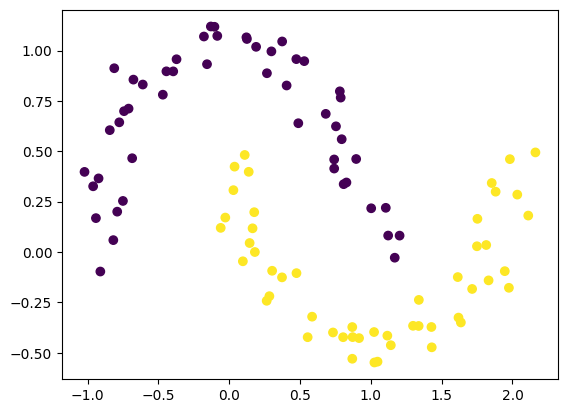

In [32]:
plt.scatter(X[:, 0], X[:, 1], c=y)


### Model

In [33]:
model = MLP(2, [16, 16, 1])
print(f'Number of layers: {len(model.layers)}')
print(f'Number of parameters: {len(model.parameters())}')

Number of layers: 3
Number of parameters: 337


### Training setup

In [34]:
def loss(batch_size=None):
    if batch_size is None:
        Xb, yb = X, y
    else:
        rand_idxs = np.random.permitation(X.shape[0])[:batch_size]
        Xb, yb = X[rand_idxs, :], y[rand_idxs]
    
    inputs = [list(map(Value, x_row)) for x_row in Xb]

    scores = list(map(model, inputs))
    
    # svm hinge loss ("max-margin")
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    hinge_loss = sum(losses)/len(losses)

    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    
    total_loss = hinge_loss + reg_loss

    cls_results = [abs((yi-scorei).data) < 1 for yi, scorei in zip(yb, scores)]
    accuracy = sum(cls_results)/len(cls_results)
    return total_loss, accuracy

loss()

(Value(data=0.7840043023159258), 0.68)

In [35]:
epochs = 100
disp_freq = 1
losses = []
accuracies = []

### Training

In [36]:
for ep_num in range(epochs):

    # forward pass
    total_loss, accuracy = loss()

    # backward pass
    model.zero_grad()
    total_loss.backward()

    # weights update
    lr = 1.0 - (0.9 * ep_num/100)
    for p in model.parameters():
        p.data -= lr * p.grad

    if ep_num % disp_freq == 0:
        losses.append(total_loss.data)
        accuracies.append(accuracy)
        print(f'epoch {ep_num+1}. loss={total_loss.data:>6.4f}; {accuracy:>6.4f}')

epoch 1. loss=0.7840; 0.6800
epoch 2. loss=0.5347; 0.7300
epoch 3. loss=0.4049; 0.8300
epoch 4. loss=0.3381; 0.8600
epoch 5. loss=0.2943; 0.8800
epoch 6. loss=0.2714; 0.9000
epoch 7. loss=0.2558; 0.9000
epoch 8. loss=0.2435; 0.9100
epoch 9. loss=0.2331; 0.9100
epoch 10. loss=0.2237; 0.9100
epoch 11. loss=0.2148; 0.9100
epoch 12. loss=0.2060; 0.9100
epoch 13. loss=0.1972; 0.9200
epoch 14. loss=0.1882; 0.9300
epoch 15. loss=0.1790; 0.9400
epoch 16. loss=0.1697; 0.9400
epoch 17. loss=0.1603; 0.9400
epoch 18. loss=0.1520; 0.9600
epoch 19. loss=0.1455; 0.9600
epoch 20. loss=0.1528; 0.9500
epoch 21. loss=0.1441; 0.9600
epoch 22. loss=0.1913; 0.9300
epoch 23. loss=0.1466; 0.9500
epoch 24. loss=0.1217; 0.9700
epoch 25. loss=0.1147; 0.9900
epoch 26. loss=0.1537; 0.9500
epoch 27. loss=0.1093; 0.9600
epoch 28. loss=0.0905; 0.9900
epoch 29. loss=0.0925; 1.0000
epoch 30. loss=0.1265; 0.9500
epoch 31. loss=0.0852; 0.9900
epoch 32. loss=0.0789; 0.9900
epoch 33. loss=0.0947; 1.0000
epoch 34. loss=0.17

(-1.548639298268643, 1.951360701731357)

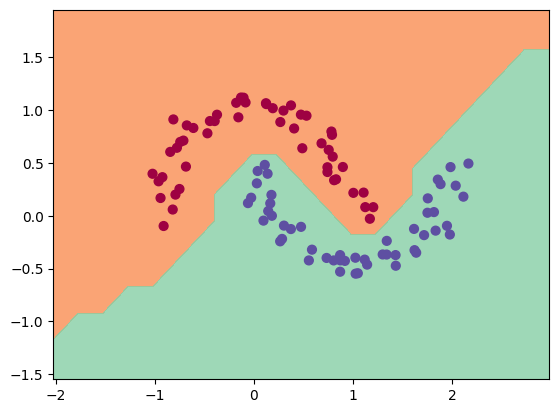

In [37]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())